In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [3]:
one_data=pd.read_excel('./data/total/one_data.xlsx')

In [4]:
one_data.head()

STDR_YM CTPRVN_NM SIGNGU_NM  LTRS_CO  중견기업수  중소기업수  TOT_ENTRPRS_CO  \
0  2015-11       강원도       강릉시        1      8   2578            1038   
1  2015-11       강원도       고성군        2      3    673             168   
2  2015-11       강원도       동해시        3      1    978             366   
3  2015-11       강원도       삼척시        1      6   1053             345   
4  2015-11       강원도       속초시        1      1    726             244   

   EMPLY_CO  ECNY_CO  RETIRE_CO  ...  취득자수  상실자수  수급자격신청자수  수급자격인정자수  \
0     12155      377        359  ...  1381  1097       254       253   
1      1685       58         47  ...   345   227        34        34   
2      3829      109         72  ...   627   422       108       106   
3      4872      145         93  ...   662   362        74        74   
4      2883      119         85  ...   574   488        80        79   

   실업급여지급자수  실업급여지급건수     실업급여지급액  신규성립사업장수  소멸사업장수   elec_use  
0      1201      1251  1119455990       627     152  153192195  
1       142       150   131855990       216      53   23730101  
2       497       543   481062430       212      58  228971780  
3       413       452   421456570       283     216  115106534  
4       436       455   436994810       151      36   36811523  

[5 rows x 27 columns]

In [5]:
one_data.isna().sum()

STDR_YM             0
CTPRVN_NM           0
SIGNGU_NM           0
LTRS_CO             0
중견기업수               0
중소기업수               0
TOT_ENTRPRS_CO      0
EMPLY_CO            0
ECNY_CO             0
RETIRE_CO           0
지급액               277
수출건수                7
수출금액                7
수입건수                7
수입금액                7
무역수지                7
피보험자수               0
취득자수                0
상실자수                0
수급자격신청자수            0
수급자격인정자수            0
실업급여지급자수            0
실업급여지급건수            0
실업급여지급액             0
신규성립사업장수            0
소멸사업장수              0
elec_use            0
dtype: int64

In [6]:
one_data.columns

Index(['STDR_YM', 'CTPRVN_NM', 'SIGNGU_NM', 'LTRS_CO', '중견기업수', '중소기업수',
       'TOT_ENTRPRS_CO', 'EMPLY_CO', 'ECNY_CO', 'RETIRE_CO', '지급액', '수출건수',
       '수출금액', '수입건수', '수입금액', '무역수지', '피보험자수', '취득자수', '상실자수', '수급자격신청자수',
       '수급자격인정자수', '실업급여지급자수', '실업급여지급건수', '실업급여지급액', '신규성립사업장수', '소멸사업장수',
       'elec_use'],
      dtype='object')

In [7]:
pd.set_option('display.max_columns', None)

In [8]:
pd.set_option('display.max_rows', None)

In [9]:
one_data[one_data['지급액'].isnull()].head()

STDR_YM CTPRVN_NM SIGNGU_NM  LTRS_CO  중견기업수  중소기업수  TOT_ENTRPRS_CO  \
5   2015-11       강원도       양구군        0      1    426             132   
9   2015-11       강원도       인제군        1      0    642             201   
79  2015-11      경상북도       영양군        3      1    270              95   
83  2015-11      경상북도       울릉군        0      0    193              82   
86  2015-11      경상북도       청도군        0      4    692             221   

    EMPLY_CO  ECNY_CO  RETIRE_CO  지급액   수출건수    수출금액   수입건수    수입금액    무역수지  \
5        965       12         30  NaN    2.0    19.0  165.0    88.0   -69.0   
9       1573       43         43  NaN   14.0    82.0  204.0    22.0    60.0   
79       689       45         25  NaN    4.0   101.0   63.0    45.0    56.0   
83       563       24         30  NaN   71.0   627.0  588.0  9443.0 -8816.0   
86      2845      102         77  NaN  269.0  8406.0  202.0  3325.0  5081.0   

    피보험자수  취득자수  상실자수  수급자격신청자수  수급자격인정자수  실업급여지급자수  실업급여지급건수    실업급여지급액  \
5    3130   168   169        26        26        84        91   77824300   
9    4407   400   397        65        65       156       160  129097140   
79   2446   174   123        25        25        51        53   39418120   
83   1130    45   153        67        67        53        53   30839720   
86   6550   423   279        27        27       154       184  156766740   

    신규성립사업장수  소멸사업장수  elec_use  
5        181      94  19327251  
9        288     200  26758919  
79       119     122   9234227  
83        45      40   4659861  
86       190     345  41723537

In [10]:
#데이터 사이즈 파악
one_data.shape 

(18091, 27)

In [11]:
# column별 데이터 타입과 실제 데이터가 있는 사이즈 확인
one_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18091 entries, 0 to 18090
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   STDR_YM         18091 non-null  object 
 1   CTPRVN_NM       18091 non-null  object 
 2   SIGNGU_NM       18091 non-null  object 
 3   LTRS_CO         18091 non-null  int64  
 4   중견기업수           18091 non-null  int64  
 5   중소기업수           18091 non-null  int64  
 6   TOT_ENTRPRS_CO  18091 non-null  int64  
 7   EMPLY_CO        18091 non-null  int64  
 8   ECNY_CO         18091 non-null  int64  
 9   RETIRE_CO       18091 non-null  int64  
 10  지급액             17814 non-null  float64
 11  수출건수            18084 non-null  float64
 12  수출금액            18084 non-null  float64
 13  수입건수            18084 non-null  float64
 14  수입금액            18084 non-null  float64
 15  무역수지            18084 non-null  float64
 16  피보험자수           18091 non-null  int64  
 17  취득자수            18091 non-null 

In [12]:
# 각 column 이해
one_data.columns

Index(['STDR_YM', 'CTPRVN_NM', 'SIGNGU_NM', 'LTRS_CO', '중견기업수', '중소기업수',
       'TOT_ENTRPRS_CO', 'EMPLY_CO', 'ECNY_CO', 'RETIRE_CO', '지급액', '수출건수',
       '수출금액', '수입건수', '수입금액', '무역수지', '피보험자수', '취득자수', '상실자수', '수급자격신청자수',
       '수급자격인정자수', '실업급여지급자수', '실업급여지급건수', '실업급여지급액', '신규성립사업장수', '소멸사업장수',
       'elec_use'],
      dtype='object')

In [13]:
# numeric data의 경우 기본 통계량(평균, 중간값 등) 확인
one_data.describe()

LTRS_CO         중견기업수         중소기업수  TOT_ENTRPRS_CO  \
count  18091.000000  18091.000000  18091.000000    18091.000000   
mean       8.451385     22.185064   4417.599082     1598.139406   
std       23.699177     49.711408   5969.732405     2117.878325   
min        0.000000      0.000000    189.000000       66.000000   
25%        1.000000      2.000000   1277.000000      334.500000   
50%        2.000000      8.000000   2656.000000      881.000000   
75%        7.000000     22.000000   4841.500000     1856.000000   
max      292.000000    560.000000  70362.000000    20077.000000   

            EMPLY_CO       ECNY_CO     RETIRE_CO           지급액           수출건수  \
count   18091.000000  18091.000000  18091.000000  1.781400e+04   18084.000000   
mean    35113.459566   1244.435742   1185.604610  7.989858e+08    3853.933256   
std     67164.053323   2464.860117   2342.739428  1.941310e+09   11839.032356   
min       512.000000      8.000000     10.000000 -7.549450e+06       0.000000   
25%      4081.500000    151.500000    147.000000  5.420531e+07     117.000000   
50%     14813.000000    518.000000    497.000000  2.254494e+08     684.000000   
75%     34262.500000   1225.000000   1156.000000  7.681508e+08    3294.250000   
max    637910.000000  34261.000000  43146.000000  4.922044e+10  478363.000000   

               수출금액           수입건수          수입금액          무역수지          피보험자수  \
count  1.808400e+04   18084.000000  1.808400e+04  1.808400e+04   18091.000000   
mean   2.075051e+05    9471.632438  1.866108e+05  2.089427e+04   58851.429716   
std    5.179477e+05   14890.833921  4.578504e+05  5.053883e+05   85644.633023   
min    0.000000e+00      43.000000  4.000000e+00 -3.690941e+06     987.000000   
25%    3.249750e+03     836.000000  5.118500e+03 -1.436050e+04   10354.000000   
50%    2.394350e+04    3883.500000  2.988650e+04 -1.300000e+02   33768.000000   
75%    1.361695e+05   11824.500000  1.341208e+05  1.840025e+04   68466.500000   
max    7.673150e+06  164267.000000  4.397580e+06  7.442813e+06  767079.000000   

               취득자수          상실자수      수급자격신청자수      수급자격인정자수      실업급여지급자수  \
count  18091.000000  18091.000000  18091.000000  18091.000000  18091.000000   
mean    2658.131391   2480.536731    415.702338    413.619092   2187.121663   
std     3693.933137   3501.542495    467.185672    465.241732   2399.460608   
min       18.000000     27.000000      2.000000      2.000000     20.000000   
25%      526.000000    486.000000     70.000000     69.000000    377.000000   
50%     1532.000000   1405.000000    247.000000    246.000000   1270.000000   
75%     3193.000000   2949.000000    616.000000    613.000000   3280.000000   
max    44420.000000  48620.000000   4982.000000   4959.000000  18071.000000   

           실업급여지급건수       실업급여지급액      신규성립사업장수        소멸사업장수      elec_use  
count  18091.000000  1.809100e+04  18091.000000  18091.000000  1.809100e+04  
mean    2407.587917  3.070624e+09    558.684373    549.041181  1.881537e+08  
std     2641.937293  3.627363e+09    657.958076    724.792625  2.478553e+08  
min       20.000000  2.200789e+07     11.000000      0.000000 -5.364793e+08  
25%      414.000000  5.066504e+08    238.000000    183.000000  4.859389e+07  
50%     1402.000000  1.681029e+09    376.000000    340.000000  1.088812e+08  
75%     3616.500000  4.428521e+09    643.000000    636.000000  2.073619e+08  
max    20434.000000  2.980218e+10  17579.000000  17376.000000  2.171722e+09

In [14]:
# 속성간 상관관계 이해
one_data_corr=one_data.corr()
one_data.corr(method='pearson') # 상관관계를 구하는 방법 정해줄 수 있음, default는 pearson

LTRS_CO     중견기업수     중소기업수  TOT_ENTRPRS_CO  EMPLY_CO  \
LTRS_CO         1.000000  0.933980  0.831233        0.744505  0.907347   
중견기업수           0.933980  1.000000  0.919897        0.870443  0.935615   
중소기업수           0.831233  0.919897  1.000000        0.963117  0.913927   
TOT_ENTRPRS_CO  0.744505  0.870443  0.963117        1.000000  0.876174   
EMPLY_CO        0.907347  0.935615  0.913927        0.876174  1.000000   
ECNY_CO         0.899907  0.931676  0.914219        0.875289  0.958217   
RETIRE_CO       0.900606  0.929874  0.911289        0.869234  0.959337   
지급액             0.538165  0.553416  0.627392        0.590768  0.592131   
수출건수            0.473400  0.489295  0.477057        0.480192  0.473902   
수출금액            0.277382  0.349214  0.328338        0.367339  0.327957   
수입건수            0.748788  0.809235  0.904027        0.883328  0.850855   
수입금액            0.712406  0.681896  0.643693        0.615704  0.735963   
무역수지           -0.361121 -0.259864 -0.246648       -0.181322 -0.330630   
피보험자수           0.876086  0.921371  0.937445        0.917149  0.979162   
취득자수            0.850864  0.911566  0.942723        0.922824  0.933462   
상실자수            0.842423  0.899865  0.927700        0.905320  0.921726   
수급자격신청자수        0.236798  0.337545  0.529693        0.594929  0.413605   
수급자격인정자수        0.236744  0.337337  0.529462        0.594796  0.413568   
실업급여지급자수        0.243946  0.345573  0.554885        0.617961  0.428208   
실업급여지급건수        0.243759  0.345824  0.554347        0.617008  0.427799   
실업급여지급액         0.231618  0.325460  0.537408        0.587168  0.407268   
신규성립사업장수        0.294689  0.386611  0.498586        0.531202  0.407659   
소멸사업장수          0.250191  0.329637  0.425197        0.453496  0.348936   
elec_use        0.228567  0.371653  0.423121        0.512245  0.346249   

                 ECNY_CO  RETIRE_CO       지급액      수출건수      수출금액      수입건수  \
LTRS_CO         0.899907   0.900606  0.538165  0.473400  0.277382  0.748788   
중견기업수           0.931676   0.929874  0.553416  0.489295  0.349214  0.809235   
중소기업수           0.914219   0.911289  0.627392  0.477057  0.328338  0.904027   
TOT_ENTRPRS_CO  0.875289   0.869234  0.590768  0.480192  0.367339  0.883328   
EMPLY_CO        0.958217   0.959337  0.592131  0.473902  0.327957  0.850855   
ECNY_CO         1.000000   0.967132  0.550100  0.468771  0.310337  0.830493   
RETIRE_CO       0.967132   1.000000  0.552108  0.469175  0.307501  0.830810   
지급액             0.550100   0.552108  1.000000  0.387488  0.205330  0.669864   
수출건수            0.468771   0.469175  0.387488  1.000000  0.345496  0.501573   
수출금액            0.310337   0.307501  0.205330  0.345496  1.000000  0.331288   
수입건수            0.830493   0.830810  0.669864  0.501573  0.331288  1.000000   
수입금액            0.693567   0.692457  0.429454  0.459417  0.469084  0.660341   
무역수지           -0.310280  -0.312181 -0.178408 -0.062121  0.599890 -0.258707   
피보험자수           0.946249   0.946267  0.605950  0.486197  0.377131  0.896731   
취득자수            0.946015   0.929597  0.577074  0.477846  0.357861  0.894584   
상실자수            0.925069   0.920057  0.579849  0.468340  0.354612  0.879815   
수급자격신청자수        0.388823   0.382112  0.426661  0.250680  0.301271  0.672323   
수급자격인정자수        0.388739   0.381995  0.426375  0.250726  0.301114  0.672364   
실업급여지급자수        0.398458   0.393170  0.486714  0.270968  0.313574  0.724779   
실업급여지급건수        0.398210   0.392245  0.487972  0.271188  0.316154  0.724018   
실업급여지급액         0.375919   0.371981  0.523947  0.266735  0.300446  0.728724   
신규성립사업장수        0.373818   0.368800  0.392524  0.284494  0.373286  0.541450   
소멸사업장수          0.320656   0.312226  0.341658  0.240717  0.325710  0.463569   
elec_use        0.321168   0.315589  0.257681  0.269793  0.727658  0.403988   

                    수입금액      무역수지     피보험자수      취득자수      상실자수  수급자격신청자수  \
LTRS_CO         0.712406 -0.361121  0.876086  0.850864  0.842423  0.236798   
중견기업수           0.681896 -0.259864

In [15]:
%matplotlib inline

In [16]:
sns.pairplot(one_data)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)

KeyboardInterrupt



### 히트맵

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<AxesSubplot:>

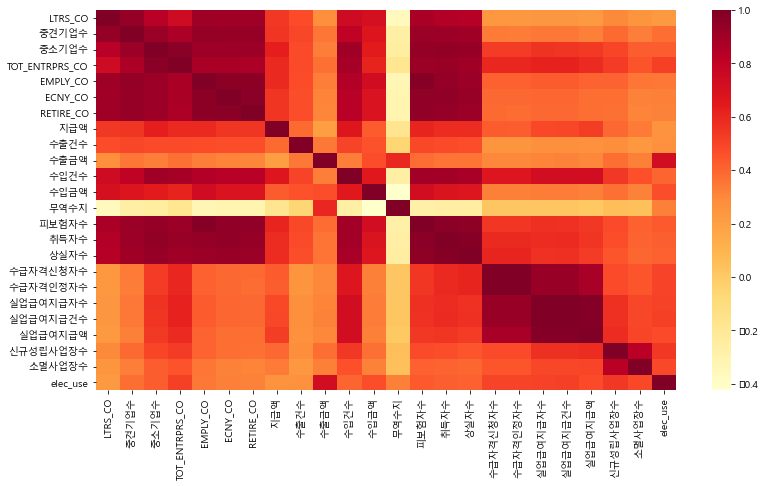

In [17]:
fig, ax = plt.subplots(figsize=(13,7))

sns.heatmap(one_data_corr,cmap = 'YlOrRd') # colormap 형태

In [18]:
one_data.corr().unstack().sort_values().drop_duplicates()

수입금액            무역수지             -0.425197
LTRS_CO         무역수지             -0.361121
무역수지            EMPLY_CO         -0.330630
                RETIRE_CO        -0.312181
ECNY_CO         무역수지             -0.310280
피보험자수           무역수지             -0.275370
무역수지            중견기업수            -0.259864
                수입건수             -0.258707
                취득자수             -0.253893
                상실자수             -0.247503
                중소기업수            -0.246648
                TOT_ENTRPRS_CO   -0.181322
                지급액              -0.178408
수출건수            무역수지             -0.062121
무역수지            실업급여지급액           0.014174
수급자격인정자수        무역수지              0.015702
수급자격신청자수        무역수지              0.016031
실업급여지급자수        무역수지              0.019003
실업급여지급건수        무역수지              0.020849
무역수지            소멸사업장수            0.046865
신규성립사업장수        무역수지              0.050514
지급액             수출금액              0.205330
LTRS_CO         elec_use          0.228567
           

In [19]:
one_data['SIGNGU_NM']

0         강릉시
1         고성군
2         동해시
3         삼척시
4         속초시
5         양구군
6         양양군
7         영월군
8         원주시
9         인제군
10        정선군
11        철원군
12        춘천시
13        태백시
14        평창군
15        홍천군
16        화천군
17        횡성군
18        가평군
19        고양시
20        과천시
21        광명시
22        광주시
23        구리시
24        군포시
25        김포시
26       남양주시
27       동두천시
28        부천시
29        성남시
30        수원시
31        시흥시
32        안산시
33        안성시
34        안양시
35        양주시
36        양평군
37        여주시
38        연천군
39        오산시
40        용인시
41        의왕시
42       의정부시
43        이천시
44        파주시
45        평택시
46        포천시
47        하남시
48        화성시
49        거제시
50        거창군
51        고성군
52        김해시
53        남해군
54        밀양시
55        사천시
56        산청군
57        양산시
58        의령군
59        진주시
60        창녕군
61        창원시
62        통영시
63        하동군
64        함안군
65        함양군
66        합천군
67        경산시
68        경주시
69        고령군
70        구미시
71    

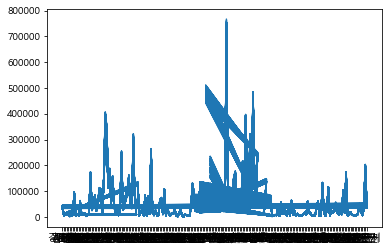

<Figure size 1440x720 with 0 Axes>

In [20]:
x=one_data['SIGNGU_NM']
y=one_data['피보험자수']
plt.plot(x, y)
plt.figure(figsize=(20,10))
plt.show()


# one_data.plot(x='SIGNGU_NM',y='피보험자수',kind = 'scatter', figsize=(20,10),size = 15)


In [21]:
# plt.figure(figsize=(720,720))
# plt.plot(one_data.STDR_YM, one_data.피보험자수, linestyle='--', linewidth=1) # 'dashed'
# plt.ylabel('insuarance', fontsize=14)
# plt.xlabel('Date', fontsize=14)
# plt.legend(fontsize=12, loc='best')
# plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


KeyboardInterrupt: 

In [22]:
one_data.isna().sum()

STDR_YM             0
CTPRVN_NM           0
SIGNGU_NM           0
LTRS_CO             0
중견기업수               0
중소기업수               0
TOT_ENTRPRS_CO      0
EMPLY_CO            0
ECNY_CO             0
RETIRE_CO           0
지급액               277
수출건수                7
수출금액                7
수입건수                7
수입금액                7
무역수지                7
피보험자수               0
취득자수                0
상실자수                0
수급자격신청자수            0
수급자격인정자수            0
실업급여지급자수            0
실업급여지급건수            0
실업급여지급액             0
신규성립사업장수            0
소멸사업장수              0
elec_use            0
dtype: int64

In [23]:
one_data[one_data['수출건수'].isna()]

STDR_YM CTPRVN_NM SIGNGU_NM  LTRS_CO  중견기업수  중소기업수  TOT_ENTRPRS_CO  \
916  2016-03       강원도       강릉시        1      8   2630            1053   
917  2016-03       강원도       고성군        2      3    690             166   
920  2016-03       강원도       속초시        1      1    735             246   
922  2016-03       강원도       양양군        0      0    584             156   
924  2016-03       강원도       원주시        3     16   4181            1783   
928  2016-03       강원도       춘천시        7     13   3206            1320   
932  2016-03       강원도       화천군        1      0    455             123   

     EMPLY_CO  ECNY_CO  RETIRE_CO          지급액  수출건수  수출금액  수입건수  수입금액  무역수지  \
916     11906      454        484  239125440.0   NaN   NaN   NaN   NaN   NaN   
917      1605       68         75    1200000.0   NaN   NaN   NaN   NaN   NaN   
920      2903      127        111   25007790.0   NaN   NaN   NaN   NaN   NaN   
922      1216       38         48    3150000.0   NaN   NaN   NaN   NaN   NaN   
924     42774     1235       1261  249224600.0   NaN   NaN   NaN   NaN   NaN   
928     21707     1016       1001  325842730.0   NaN   NaN   NaN   NaN   NaN   
932       849       34         35          NaN   NaN   NaN   NaN   NaN   NaN   

     피보험자수  취득자수  상실자수  수급자격신청자수  수급자격인정자수  실업급여지급자수  실업급여지급건수     실업급여지급액  \
916  34014  2539  2343       521       518      2157      2434  2091825760   
917   5550   404   240        40        39       312       355   317193900   
920  10863   877   611       184       181       826       961   867314210   
922   4153   294   193        24        22       215       245   224064200   
924  69941  4120  3706       811       799      3086      3382  3045224870   
928  46442  3599  3803       491       490      2468      2824  2561937890   
932   2809   267   141        20        20       194       229   204755300   

     신규성립사업장수  소멸사업장수   elec_use  
916       696     322  166587311  
917       225      75   27427398  
920       131      86   41393684  
922       182      59   24480722  
924       796    2034  217382508  
928       836     976  145368467  
932       186     363   24348700

In [24]:
one_data.loc[916,'수출건수':'무역수지']=[212,12100,1823,11812,288]

In [25]:
one_data.loc[916,'수출건수':'무역수지']

수출건수      212.0
수출금액    12100.0
수입건수     1823.0
수입금액    11812.0
무역수지      288.0
Name: 916, dtype: object

In [26]:
one_data.loc[917,'수출건수':'무역수지']=[31,399,232,112,286]

In [27]:
one_data.loc[920,'수출건수':'무역수지']=[30,1743,609,3663,-1919]

In [28]:
one_data.loc[922,'수출건수':'무역수지']=[20,406,194,262,144]

In [29]:
one_data.loc[924,'수출건수':'무역수지']=[1509,53559,4079,26740,26819]

In [30]:
one_data.loc[928,'수출건수':'무역수지']=[404,13912,3393,7716,6196]

In [31]:
one_data.loc[932,'수출건수':'무역수지']=[28,605,268,68,537]

In [32]:
one_data[one_data['수출건수'].isna()]

Empty DataFrame
Columns: [STDR_YM, CTPRVN_NM, SIGNGU_NM, LTRS_CO, 중견기업수, 중소기업수, TOT_ENTRPRS_CO, EMPLY_CO, ECNY_CO, RETIRE_CO, 지급액, 수출건수, 수출금액, 수입건수, 수입금액, 무역수지, 피보험자수, 취득자수, 상실자수, 수급자격신청자수, 수급자격인정자수, 실업급여지급자수, 실업급여지급건수, 실업급여지급액, 신규성립사업장수, 소멸사업장수, elec_use]
Index: []

In [33]:
one_data[one_data['지급액'].isna()]

STDR_YM CTPRVN_NM SIGNGU_NM  LTRS_CO  중견기업수  중소기업수  TOT_ENTRPRS_CO  \
5      2015-11       강원도       양구군        0      1    426             132   
9      2015-11       강원도       인제군        1      0    642             201   
79     2015-11      경상북도       영양군        3      1    270              95   
83     2015-11      경상북도       울릉군        0      0    193              82   
86     2015-11      경상북도       청도군        0      4    692             221   
87     2015-11      경상북도       청송군        0      0    564             148   
176    2015-11      전라남도       신안군        2      0    965             208   
215    2015-11      충청남도       청양군        0      1    712             178   
240    2015-12       강원도       철원군        1      1    662             217   
243    2015-12       강원도       평창군        1      2   1131             287   
294    2015-12      경상남도       함양군        0      0    831             206   
300    2015-12      경상북도       군위군        0      1    585             213   
307    2015-12      경상북도       영덕군        0      1    582             181   
308    2015-12      경상북도       영양군        3      1    271              95   
312    2015-12      경상북도       울릉군        0      0    192              82   
313    2015-12      경상북도       울진군        0      0    786             269   
314    2015-12      경상북도       의성군        0      0    983             284   
316    2015-12      경상북도       청송군        0      0    565             147   
392    2015-12     인천광역시       옹진군        1      0    294              79   
396    2015-12      전라남도       곡성군        1      0    817             234   
445    2015-12      충청남도       태안군        4      3   1382             301   
464    2016-01       강원도       양양군        0      0    581             155   
514    2016-01      경상남도       산청군        1      0    886             246   
537    2016-01      경상북도       영양군        3      1    271              95   
541    2016-01      경상북도       울릉군        0      0    189              82   
688    2016-02       강원도       고성군        2      3    685             164   
693    2016-02       강원도       양양군        0      0    583             157   
740    2016-02      경상남도       남해군        0      0    609             151   
761    2016-02      경상북도       봉화군        1      0    627             165   
765    2016-02      경상북도       영덕군        0      1    581             178   
766    2016-02      경상북도       영양군        3      1    273              96   
770    2016-02      경상북도       울릉군        0      0    191              83   
850    2016-02     인천광역시       옹진군        1      0    296              80   
870    2016-02      전라남도       진도군        0      0    978             157   
927    2016-03       강원도       철원군        1      1    676             220   
932    2016-03       강원도       화천군        1      0    455             123   
987    2016-03      경상북도       군위군        0      1    605             218   
994    2016-03      경상북도       영덕군        1      1    585             181   
995    2016-03      경상북도       영양군        3      1    274              96   
999    2016-03      경상북도       울릉군        0      0    194              82   
1003   2016-03      경상북도       청송군        0      0    571             149   
1098   2016-03      전라남도       장흥군        1      1   1170             221   
1136   2016-03      충청북도       보은군        0      2    781             214   
1224   2016-04      경상북도       영양군        3      1    279              97   
1228   2016-04      경상북도       울릉군        0      0    195              83   
1328   2016-04      전라남도       진도군        0      0    985             153   
1375   2016-05       강원도       고성군        2      3    697             166   
1380   2016-05       강원도       양양군        0      0    594             157   
1437   2016-05      경상남도       하동군        0      0    924             240   
1453   2016-05      경상북도       영양군        3      1    279              97   
1457   2016-05      경상북도       울릉군        0      0    195              83   
160

In [34]:
one_data['지급액'].fillna(0, inplace=True)

In [36]:
one_data.isna().sum()

STDR_YM           0
CTPRVN_NM         0
SIGNGU_NM         0
LTRS_CO           0
중견기업수             0
중소기업수             0
TOT_ENTRPRS_CO    0
EMPLY_CO          0
ECNY_CO           0
RETIRE_CO         0
지급액               0
수출건수              0
수출금액              0
수입건수              0
수입금액              0
무역수지              0
피보험자수             0
취득자수              0
상실자수              0
수급자격신청자수          0
수급자격인정자수          0
실업급여지급자수          0
실업급여지급건수          0
실업급여지급액           0
신규성립사업장수          0
소멸사업장수            0
elec_use          0
dtype: int64

In [37]:
dataset=one_data

In [38]:
dataset.to_excel('dataset.xlsx',index=False)

In [39]:
dataset.isna().sum()

STDR_YM           0
CTPRVN_NM         0
SIGNGU_NM         0
LTRS_CO           0
중견기업수             0
중소기업수             0
TOT_ENTRPRS_CO    0
EMPLY_CO          0
ECNY_CO           0
RETIRE_CO         0
지급액               0
수출건수              0
수출금액              0
수입건수              0
수입금액              0
무역수지              0
피보험자수             0
취득자수              0
상실자수              0
수급자격신청자수          0
수급자격인정자수          0
실업급여지급자수          0
실업급여지급건수          0
실업급여지급액           0
신규성립사업장수          0
소멸사업장수            0
elec_use          0
dtype: int64

In [ ]:
# #강원도 지급액 널값 강원도 평균치로 제거
# kt=one_data.loc[(one_data['STDR_YM']=='2015-11')&(one_data['CTPRVN_NM']=='강원도'), '지급액'].fillna(51560740.0)

# kt

# yt=one_data.loc[(one_data['STDR_YM']=='2015-11')&(one_data['CTPRVN_NM']=='강원도'), '지급액']

# yt=kt

# one_data.loc[(one_data['STDR_YM']=='2015-11')&(one_data['CTPRVN_NM']=='강원도'), '지급액']=yt

# one_data.isna().sum()

# #경상북도 지급액 널값 경상북도 평균치로 제거
# one_data.loc[(one_data['STDR_YM']=='2015-11')&(one_data['CTPRVN_NM']=='경상북도'), '지급액'].mean()

# ks=one_data.loc[(one_data['STDR_YM']=='2015-11')&(one_data['CTPRVN_NM']=='경상북도'), '지급액'].fillna(119467912.1)

# one_data.loc[(one_data['STDR_YM']=='2015-11')&(one_data['CTPRVN_NM']=='경상북도'), '지급액']=ks

# one_data.isna().sum()

# #전라남도 지급액 널값 전라남도 평균치로 제거
# one_data.loc[(one_data['STDR_YM']=='2015-11')&(one_data['CTPRVN_NM']=='전라남도'), '지급액'].mean()

# jl=one_data.loc[(one_data['STDR_YM']=='2015-11')&(one_data['CTPRVN_NM']=='전라남도'), '지급액'].fillna(50126648.09)
# one_data.loc[(one_data['STDR_YM']=='2015-11')&(one_data['CTPRVN_NM']=='전라남도'), '지급액']=jl


# #충청남도 지급액 널값 충청남도 평균치로 제거

# chn=one_data.loc[(one_data['STDR_YM']=='2015-11')&(one_data['CTPRVN_NM']=='충청남도'), '지급액'].fillna(one_data.loc[(one_data['STDR_YM']=='2015-11')&(one_data['CTPRVN_NM']=='충청남도'), '지급액'].mean())
# one_data.loc[(one_data['STDR_YM']=='2015-11')&(one_data['CTPRVN_NM']=='충청남도'), '지급액']=chn

# #2015-12 강원도 지급액 널값 강원도 평균치로 제거

# gw12=one_data.loc[(one_data['STDR_YM']=='2015-12')&(one_data['CTPRVN_NM']=='강원도'), '지급액'].fillna(one_data.loc[(one_data['STDR_YM']=='2015-11')&(one_data['CTPRVN_NM']=='강원도'), '지급액'].mean())
# one_data.loc[(one_data['STDR_YM']=='2015-12')&(one_data['CTPRVN_NM']=='강원도'), '지급액']=gw12

# #2015-12 강원도 지급액 널값 강원도 평균치로 제거

# gw12=one_data.loc[(one_data['STDR_YM']=='2015-12')&(one_data['CTPRVN_NM']=='경상남도'), '지급액'].fillna(one_data.loc[(one_data['STDR_YM']=='2015-11')&(one_data['CTPRVN_NM']=='강원도'), '지급액'].mean())
# one_data.loc[(one_data['STDR_YM']=='2015-12')&(one_data['CTPRVN_NM']=='경상남도'), '지급액']=gw12